<a href="https://colab.research.google.com/github/AnnaVeller/detect-license-plates/blob/master/Detect_license_plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Загрузка всееееего необходимого



In [ ]:
!pip install asyncio

In [ ]:
!pip install cython
!pip install matplotlib
!pip install setuptools
!pip install numpy
!pip install Keras==2.2.*
!pip install imgaug
#!pip install tensorflow==1.15.2
!pip install tensorflow-gpu==1.15.2
!pip install opencv_python
!pip install imutils
!pip install scikit_image
!pip install jupyter

!pip install GitPython
!pip install pycocotools
!pip install tqdm

In [ ]:
!pip install Nomeroff-net-gpu

In [ ]:
!pip install mrcnn

In [5]:
import os
import numpy as np
import sys
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
NOMEROFF_NET_DIR = os.path.abspath("/content/")
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')
sys.path.append(NOMEROFF_NET_DIR)
from NomeroffNet import filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing, textPostprocessingAsync

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel("latest")

rectDetector = RectDetector()

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector.get_static_module("ru")()
textDetector.load("latest")

In [7]:
stroka = """01	Республика Адыгея	
02	Республика Башкортостан	
03	Республика Бурятия	
04	Республика Алтай	
05	Республика Дагестан	
06	Республика Ингушетия	
07	Кабардино-Балкарская Республика	
08	Республика Калмыкия	
09	Карачаево-Черкесская Республика	
10	Республика Карелия	
11	Республика Коми	
12	Республика Марий-Эл	
13	Республика Мордовия	
14	Республика Саха-Якутия	
15	Республика Северная Осетия-Алания	
16	Республика Татарстан	
17	Республика Тува	
18	Удмуртская Республика	
19	Республика Хакасия	
20	Чеченская Республика	В 2000 году все номера заменили на новые с кодом 95
21	Чувашская Республика	
22	Алтайский край	
23	Краснодарский край	
24	Красноярский край	
25	Приморский край	
26	Ставропольский край	
27	Хабаровский край	
28	Амурская область	
29	Архангельская область	
30	Астраханская область	
31	Белгородская область	
32	Брянская область	
33	Владимирская область	
34	Волгоградская область	
35	Вологодская область	
36	Воронежская область	
37	Ивановская область	
38	Иркутская область	
39	Калининградская область	
40	Калужская область	
41	Камчатский край	до 2007 года — Камчатская область
42	Кемеровская область	
43	Кировская область	
44	Костромская область	
45	Курганская область	
46	Курская область	
47	Ленинградская область	
48	Липецкая область	
49	Магаданская область	
50	Московская область	
51	Мурманская область	
52	Нижегородская область	
53	Новгородская область	
54	Новосибирская область	
55	Омская область	
56	Оренбургская область	
57	Орловская область	
58	Пензенская область	
59	Пермский край	до 2005 года — Пермская область
60	Псковская область	
61	Ростовская область	
62	Рязанская область	
63	Самарская область	
64	Саратовская область	
65	Сахалинская область	
66	Свердловская область	
67	Смоленская область	
68	Тамбовская область	
69	Тверская область	
70	Томская область	
71	Тульская область	
72	Тюменская область	
73	Ульяновская область	
74	Челябинская область	
75	Забайкальский край	до 2008 года — Читинская область
76	Ярославская область	
77	Москва	
78	Санкт-Петербург	
79	Еврейская автономная область	
80	бывший Агинский Бурятский автономный округ	с 2008 года в составе Забайкальского края
81	бывший Коми-Пермяцкий автономный округ	с 2005 года в составе Пермского края
82	Республика Крым	с 2014 года, до 2007 года номера выдавались в Корякском автономном округе
83	Ненецкий автономный округ	
84	бывший Таймырский автономный округ	с 2007 года в составе Красноярского края
85	бывший Усть-Ордынский Бурятский автономный округ	с 2008 года в составе Иркутской области
86	Ханты-Мансийский автономный округ	
87	Чукотский автономный округ	
88	бывший Эвенкийский автономный округ	с 2007 года в составе Красноярского края
89	Ямало-Ненецкий автономный округ	
90	Московская область	с 2001 года
91	Калининградская область	код используется только на экспортных транзитных номерах
92	Севастополь	с 2014 года
93	Краснодарский край	с 2005 года
94	Байконур	территории, находящиеся за пределами РФ
95	Чеченская республика	с 2000 года
96	Свердловская область	с 2006 года
97	Москва	с 2002 года
98	Санкт-Петербург	с 2004 года
99	Москва	с 1998 года
102	Республика Башкортостан	с 2006 года
113	Республика Мордовия	с 2009 года
116	Республика Татарстан	с 2006 года
121	Чувашская Республика	с 2008 года
122	Алтайский край	с 2019 года
123	Краснодарский край	с 2011 года
124	Красноярский край	с 2009 года
125	Приморский край	с 2005 года
126	Ставропольский край	с 2013 года
134	Волгоградская область	с 2012 года
136	Воронежская область	с 2010 года
138	Иркутская область	с 2013 года
142	Кемеровская область	с 2011 года
147	Ленинградская область	с 2019 года
150	Московская область	с 2006 года
152	Нижегородская область	с 2009 года
154	Новосибирская область	с 2010 года
156	Оренбургская область	с 2020 года
159	Пермский край	с 2007 года
161	Ростовская область	с 2007 года
163	Самарская область	с 2006 года
164	Саратовская область	с 2005 года
173	Ульяновская область	с 2007 года
174	Челябинская область	с 2007 года
177	Москва	с 2005 года
178	Санкт-Петербург	с 2010 года
186	Ханты-Мансийский автономный округ	с 2012 года
190	Московская область	с 2009 года
193	Краснодарский край	с 2019 года
196	Свердловская область	с 2013 года
197	Москва	с 2010 года
198	Санкт-Петербург	с 2018 года
199	Москва	с 2007 года
702	Республика Башкортостан	с 2019 года
750	Московская область	с 2013 года
716	Республика Татарстан	с 2017 года
761	Ростовская область	с 2019 года
763	Самарская область	с 2017 года
774	Челябинская область	с 2020 года
777	Москва	с 2013 года
790	Московская область	с 2020 года
797	Москва	с 2020 года
799	Москва"""

In [29]:
str2 = stroka.split('\n')
all_region = []
for reg in str2:
  tmp = reg.split('\t')
  all_region.append(tmp[0])

In [85]:
def detect_number(img, name):
  NP = nnet.detect([img])

  # Generate image mask.
  cv_img_masks = filters.cv_img_mask(NP)

  # Detect points.
  arrPoints = rectDetector.detect(cv_img_masks)
  zones = rectDetector.get_cv_zonesBGR(img, arrPoints)

  # find standart
  regionIds, stateIds, countLines = optionsDetector.predict(zones)
  regionNames = optionsDetector.getRegionLabels(regionIds)

  # find text with postprocessing by standart
  textArr = textDetector.predict(zones)
  textArr = textPostprocessing(textArr, regionNames)
  
  state = False   # нашли ли номер?
  status = False    # совпадает ли с данным
  if len(textArr) > 0:
    state = True
    for number in textArr:
        if name == number:
            status = True
    #plt.axis("off")
    #plt.imshow(img)
    #plt.show()
    #for zone, points in zip(zones, arrPoints):
            #plt.axis("off")
            #plt.imshow(zone)
            #plt.show()  
    #print(" real: ", name, '\n', "predict: ", textArr, status, '\n')
    
  return state, textArr, status

### Загрузка изображений или видео

In [98]:
#pic.append('/content/test/H388PY123.MOV')
#pic.append('/content/test/H755XC93.MOV')
#pic.append('/content/test/HH093960.MOV')
#names.append('BB843260')
#names.append('H388PY123')
#names.append('H755XC93')
#names.append('HH093960')

In [ ]:
!rm -rf /content/test   # не забывать где мы находимся
!mkdir test
%cd test/
from google.colab import files
uploaded = files.upload()
pic = []
names = []
for fn in uploaded.keys():
  print('User uploaded file «{name}» with length {length} bytes'.format(
  name=fn, length=len(uploaded[fn])))
  pic.append("/content/test/" + fn)
  names.append(fn.split('.')[0])
  #names.append('A088KK60')
%cd ../ 

In [ ]:
predict_list = []
right_detect = 0
detect = 0
graph_y = []
graph_x = []

video_path = pic[1] #временно
name = names[1] #временно берем 1 видео, которое загрузилось первым
video = cv2.VideoCapture(video_path)
flag = video.set(cv2.CAP_PROP_FPS, 8) #не работает тут
#print(flag)

all_count = 0
x = 0

while(True):
  ret, frame = video.read()
  print("файл открылся: ", ret)
  if not ret:
    break
  #img = mpimg.imread(pic[i]) #если есть только пути, а не фото в массиве pic
  lst = []
  state, lst, status = detect_number(frame, name)   #нашли номер, массив найденных номеров, совпадает ли 
  predict_list.extend(lst)
  graph_x.append(x)
  x += 1
  if state == True:
    detect += 1
    if status == True:
      right_detect += 1 
      graph_y.append(1) 
    else:
      graph_y.append(0.5)
  else:
    graph_y.append(-1)
  all_count += 1
print(predict_list)

***График правильности***
* Ось y: вверх - распознало номер, еще в верх - правильно, вниз - неправильно
* Ось x: номер стоп-кадра






In [ ]:
plt.bar(graph_x, graph_y)
plt.show()

In [ ]:
print( 
""" 
 всего изображений     | %d
 ---------------------
 найдено номеров       | %d
 ---------------------
 определенно правильно | %d
 ---------------------
 процент правильности  | %f %%
 ---------------------
 процент правильно     |
 детектированных       |%f %%
 из найденных          |
"""
%(
  all_count,
  detect,
  right_detect,
  right_detect/all_count*100,
  right_detect/detect*100
  ))

#### **Регистрационные знаки легковых, грузовых автомобилей и автобусов**


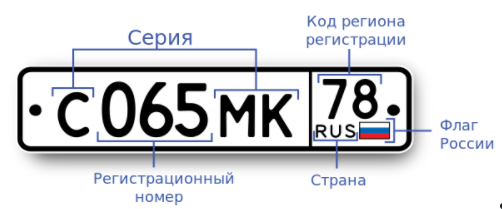

#### **Регистрационные знаки для автомобильных прицепов и полуприцепов**


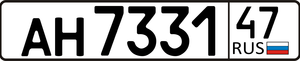


### **Модуль для убирания заранее неподходящих номеров**  
*Номера отбрасываются, если они не подходят под правила*


#### **Правила для легковых, грузовых автомобилей и автобусов**:
*   Длина = 8 или 9
*   Первый, пятый, шестой символ - буквы
*   Второй, третий, четвертый - цифры
*   Последние три или два символа - регион, должны быть в списке регионов России 



In [ ]:
import collections
c = collections.Counter()
for word in predict_list:
  c[word] += 1
ans = []
for num in list(c.most_common()):
  tmp = list(num[0])
  if len(tmp)==8 or len(tmp)==9:
    tmp_num = tmp[1:4]
    tmp_region = tmp[6:]
    tmp_literal = [tmp[0]]
    tmp_literal.extend(tmp[4:6])                            
    tmp_num = ''.join(map(str, tmp_num))    # должно быть числом
    tmp_region = ''.join(map(str, tmp_region))    # должно быть числом
    tmp_literal = ''.join(map(str, tmp_literal))    # должно быть буквами
    if tmp_num.isdigit() and tmp_literal.isalpha() and tmp_region.isdigit():
      if tmp_region in all_region:
        ans.append(num[0])        

tmp_list = []   # список найденных номеров - неподходящие по правилам
all_numbers = collections.Counter()
for num in predict_list:
  if num in ans:
    all_numbers[num] += 1 
    tmp_list.append(num)


r = list(map(lambda x: x[6:], tmp_list))
fl = list(map(lambda x: x[0], tmp_list))
sl = list(map(lambda x: x[4], tmp_list))
tl = list(map(lambda x: x[5], tmp_list))
fn = list(map(lambda x: x[1], tmp_list))
sn = list(map(lambda x: x[2], tmp_list))
tn = list(map(lambda x: x[3], tmp_list))

region = collections.Counter()
first_lit = collections.Counter()
second_lit = collections.Counter()
third_lit = collections.Counter()
first_num = collections.Counter()
second_num = collections.Counter()
third_num = collections.Counter()

for i in r:
  region[i] += 1
for i in fl:
  first_lit[i] += 1
for i in sl:
  second_lit[i] += 1
for i in tl:
  third_lit[i] += 1
for i in fn:
  first_num[i] += 1
for i in sn:
  second_num[i] += 1
for i in tn:
  third_num[i] += 1

detect_region = region.most_common(1)[0][0]
detect_first_lit = first_lit.most_common(1)[0][0]
detect_second_lit = second_lit.most_common(1)[0][0]
detect_third_lit = third_lit.most_common(1)[0][0]
detect_first_num = first_num.most_common(1)[0][0]
detect_second_num = second_num.most_common(1)[0][0]
detect_third_num = third_num.most_common(1)[0][0]


print('Варианты и кол-во')
print(first_lit.most_common())
print(first_num.most_common())
print(second_num.most_common())
print(third_num.most_common())
print(second_lit.most_common())
print(third_lit.most_common())
print(region.most_common(), '\n')

print("Список встречаемых номеров и их кол-во:")
print(list(c.most_common()), '\n')
print('Список подходящих номеров:')
print(list(all_numbers.most_common()), '\n')
print('ПРЕДПОЛАГАЕМЫЙ ОТВЕТ: ', detect_first_lit, detect_first_num, detect_second_num , 
      detect_third_num, detect_second_lit, detect_third_lit, detect_region, sep='')
print("правильный ответ: ", name)

### **КОД СРАЗУ ДЛЯ ВСЕХ ФАЙЛОВ**

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


/content/test/A659XE178.mp4


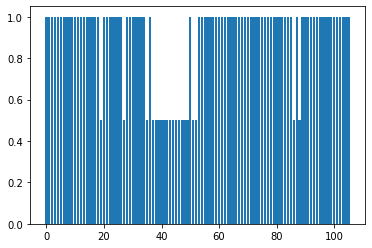

 
  всего изображений     | 106
  ---------------------
  найдено номеров       | 106
  ---------------------
  определенно правильно | 86
  ---------------------
  процент правильности  | 81.132075 %
  ---------------------
  процент правильно     |
  детектированных       | 81.132075 %
  из найденных          |
  
Варианты и кол-во
[('A', 88)]
[('6', 88)]
[('5', 88)]
[('9', 88)]
[('X', 87), ('Y', 1)]
[('E', 88)]
[('178', 87), ('173', 1)] 

Список встречаемых номеров и их кол-во:
[('A659XE178', 86), ('A440E176', 2), ('HOOA71', 1), ('A659XE172', 1), ('6654AAY', 1), ('A59XE178', 1), ('A65YB178', 1), ('A659E178', 1), ('A460T', 1), ('A40E6', 1), ('A440YE6', 1), ('AA60E42', 1), ('A44BE178', 1), ('A640E177', 1), ('6440BE1B', 1), ('A65ETB', 1), ('A659YE178', 1), ('A659XE173', 1), ('63M7', 1), ('E1316', 1), ('11913', 1)] 

Список подходящих номеров:
[('A659XE178', 86), ('A659YE178', 1), ('A659XE173', 1)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  A659XE178
ПРАВИЛЬНЫЙ ОТВЕТ    :  A659XE178 True



/content/test

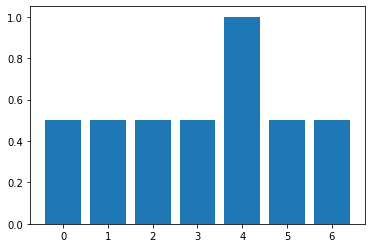

 
  всего изображений     | 7
  ---------------------
  найдено номеров       | 7
  ---------------------
  определенно правильно | 1
  ---------------------
  процент правильности  | 14.285714 %
  ---------------------
  процент правильно     |
  детектированных       | 14.285714 %
  из найденных          |
  
Варианты и кол-во
[('E', 4)]
[('2', 4)]
[('6', 3), ('5', 1)]
[('8', 3), ('0', 1)]
[('X', 4)]
[('E', 4)]
[('123', 3), ('23', 1)] 

Список встречаемых номеров и их кол-во:
[('E26XE120', 1), ('E268XE120', 1), ('E258XE123', 1), ('E260XE123', 1), ('E268XE123', 1), ('E28XE123', 1), ('E268XE23', 1)] 

Список подходящих номеров:
[('E258XE123', 1), ('E260XE123', 1), ('E268XE123', 1), ('E268XE23', 1)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  E268XE123
ПРАВИЛЬНЫЙ ОТВЕТ    :  E268XE123 True



/content/test/E268XE123.mp4


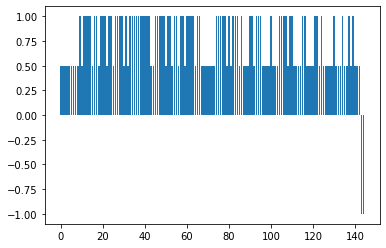

 
  всего изображений     | 145
  ---------------------
  найдено номеров       | 143
  ---------------------
  определенно правильно | 75
  ---------------------
  процент правильности  | 51.724138 %
  ---------------------
  процент правильно     |
  детектированных       | 52.447552 %
  из найденных          |
  
Варианты и кол-во
[('E', 99)]
[('2', 99)]
[('6', 99)]
[('8', 99)]
[('X', 99)]
[('E', 99)]
[('123', 75), ('12', 19), ('122', 2), ('13', 2), ('10', 1)] 

Список встречаемых номеров и их кол-во:
[('E268XE123', 75), ('E268XE120', 26), ('E268XE12', 19), ('E268XE1203', 4), ('E268XE122', 2), ('E268XE103', 2), ('E268XE13', 2), ('38O614', 1), ('OA45AT93', 1), ('ABAAT97', 1), ('AE24AT6', 1), ('AA4AE117', 1), ('61151AH', 1), ('12BXP9O37', 1), ('AP26XET03', 1), ('E268XE128', 1), ('E268XE10', 1), ('E268XE100', 1), ('E2635XE403', 1), ('E25O5BE120', 1)] 

Список подходящих номеров:
[('E268XE123', 75), ('E268XE12', 19), ('E268XE122', 2), ('E268XE13', 2), ('E268XE10', 1)] 

ПРЕДПОЛАГАЕМЫЙ О

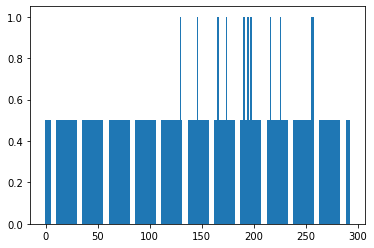

 
  всего изображений     | 293
  ---------------------
  найдено номеров       | 293
  ---------------------
  определенно правильно | 23
  ---------------------
  процент правильности  | 7.849829 %
  ---------------------
  процент правильно     |
  детектированных       | 7.849829 %
  из найденных          |
  
Варианты и кол-во
[('E', 64), ('T', 17), ('H', 3), ('A', 3)]
[('7', 65), ('5', 12), ('1', 5), ('2', 2), ('4', 2), ('8', 1)]
[('9', 64), ('2', 10), ('0', 5), ('1', 4), ('4', 2), ('5', 2)]
[('6', 67), ('1', 18), ('4', 2)]
[('P', 66), ('Y', 16), ('T', 3), ('A', 1), ('K', 1)]
[('M', 53), ('E', 16), ('H', 12), ('P', 3), ('C', 2), ('A', 1)]
[('12', 32), ('123', 25), ('142', 5), ('43', 4), ('42', 4), ('14', 4), ('44', 2), ('13', 2), ('51', 1), ('62', 1), ('16', 1), ('46', 1), ('10', 1), ('122', 1), ('125', 1), ('23', 1), ('03', 1)] 

Список встречаемых номеров и их кол-во:
[('E796PH120', 45), ('E796PM123', 23), ('E796PM12', 23), ('E796PM120', 11), ('E796PH12', 6), ('1A544PM4', 5), (

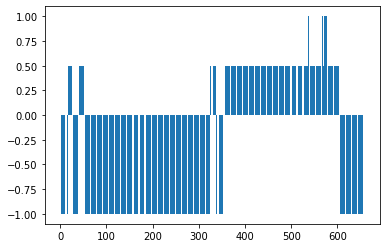

 
  всего изображений     | 659
  ---------------------
  найдено номеров       | 287
  ---------------------
  определенно правильно | 13
  ---------------------
  процент правильности  | 1.972686 %
  ---------------------
  процент правильно     |
  детектированных       | 4.529617 %
  из найденных          |
  
Варианты и кол-во
[('H', 46), ('M', 7)]
[('1', 53)]
[('3', 42), ('5', 6), ('8', 4), ('0', 1)]
[('3', 53)]
[('O', 39), ('A', 12), ('E', 1), ('B', 1)]
[('E', 35), ('H', 12), ('K', 6)]
[('123', 24), ('173', 13), ('17', 6), ('18', 4), ('12', 2), ('13', 2), ('16', 1), ('126', 1)] 

Список встречаемых номеров и их кол-во:
[('H13AY11', 14), ('H133OE123', 13), ('HAA4H1', 12), ('A153H1', 10), ('574A4T1', 8), ('AAH79HO', 7), ('HA984H1', 6), ('H134H1', 6), ('M133OK17', 6), ('H133OE1', 6), ('414A1', 5), ('H133H1', 5), ('H13441', 5), ('H133AH173', 5), ('A9AA4H1', 4), ('AA4O18', 4), ('0A184H1', 4), ('H13AH', 4), ('H13AE17', 4), ('H33OE123', 4), ('H183OE123', 4), ('H133OE18', 4), ('B83A4H',

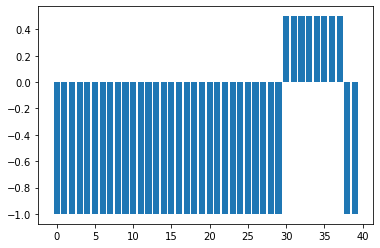

 
  всего изображений     | 40
  ---------------------
  найдено номеров       | 8
  ---------------------
  определенно правильно | 0
  ---------------------
  процент правильности  | 0.000000 %
  ---------------------
  процент правильно     |
  детектированных       | 0.000000 %
  из найденных          |
  
[('A93A', 1), ('7TKA441', 1), ('A7AO2', 1), ('AT3E123', 1), ('H133OE112', 1), ('H17OE13', 1), ('H33OE123', 1), ('H7T7O7', 1)]
НОМЕР НЕ СООТВЕТСВУЕТ ГОСТУ легковых автомобилей


/content/test/K253AE154.mp4


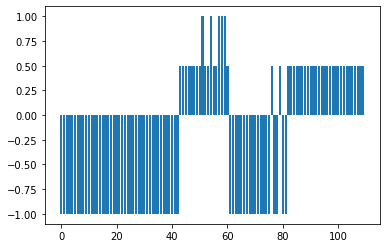

 
  всего изображений     | 110
  ---------------------
  найдено номеров       | 48
  ---------------------
  определенно правильно | 5
  ---------------------
  процент правильности  | 4.545455 %
  ---------------------
  процент правильно     |
  детектированных       | 10.416667 %
  из найденных          |
  
Варианты и кол-во
[('K', 7), ('A', 2)]
[('2', 9)]
[('5', 9)]
[('3', 9)]
[('A', 9)]
[('E', 9)]
[('154', 6), ('54', 2), ('134', 1)] 

Список встречаемых номеров и их кол-во:
[('A223', 18), ('K72Y5', 8), ('K253AE154', 5), ('K253AE54', 2), ('251AAT4', 1), ('Y253A36', 1), ('K250ATT4', 1), ('AT5TAE436', 1), ('AO5TAE434', 1), ('A53AE5', 1), ('A253AE144', 1), ('A253AE134', 1), ('253AE134', 1), ('A253AE154', 1), ('253AE154', 1), ('18', 1), ('1631', 1), ('1222AA', 1), ('182AA4', 1)] 

Список подходящих номеров:
[('K253AE154', 5), ('K253AE54', 2), ('A253AE134', 1), ('A253AE154', 1)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  K253AE154
ПРАВИЛЬНЫЙ ОТВЕТ    :  K253AE154 True



/content/test/M027PT65.mp4


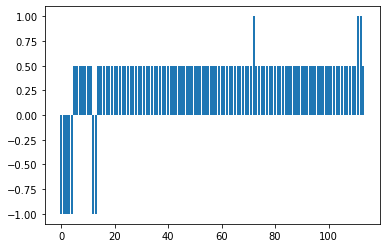

 
  всего изображений     | 114
  ---------------------
  найдено номеров       | 107
  ---------------------
  определенно правильно | 3
  ---------------------
  процент правильности  | 2.631579 %
  ---------------------
  процент правильно     |
  детектированных       | 2.803738 %
  из найденных          |
  
Варианты и кол-во
[('H', 14), ('M', 10), ('A', 1)]
[('0', 24), ('4', 1)]
[('2', 24), ('0', 1)]
[('7', 18), ('3', 5), ('2', 2)]
[('P', 21), ('B', 2), ('A', 1), ('T', 1)]
[('T', 23), ('X', 1), ('K', 1)]
[('65', 8), ('66', 8), ('64', 4), ('15', 2), ('63', 2), ('13', 1)] 

Список встречаемых номеров и их кол-во:
[('H027PT65', 5), ('M027PT65', 3), ('M023PT66', 3), ('H027PT66', 3), ('T48AA8', 2), ('027PTA5', 2), ('H027PT64', 2), ('023PT65', 2), ('M027PT66', 2), ('M027BT63', 2), ('H44444', 1), ('EH41AA4A1', 1), ('H23BA8', 1), ('H744AA7', 1), ('4744444', 1), ('757474', 1), ('AH19O1', 1), ('4540444', 1), ('H4444744', 1), ('44Y4A4', 1), ('451AT6', 1), ('444A14', 1), ('H44AA7', 1), ('447

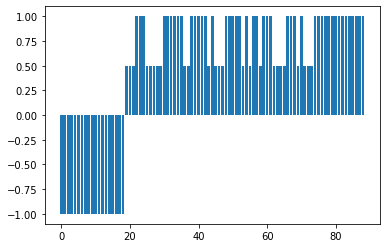

 
  всего изображений     | 89
  ---------------------
  найдено номеров       | 70
  ---------------------
  определенно правильно | 45
  ---------------------
  процент правильности  | 50.561798 %
  ---------------------
  процент правильно     |
  детектированных       | 64.285714 %
  из найденных          |
  
Варианты и кол-во
[('P', 51), ('M', 1)]
[('4', 50), ('3', 1), ('6', 1)]
[('7', 51), ('2', 1)]
[('1', 50), ('4', 1), ('0', 1)]
[('M', 49), ('B', 1), ('Y', 1), ('A', 1)]
[('B', 52)]
[('71', 49), ('11', 1), ('81', 1), ('31', 1)] 

Список встречаемых номеров и их кол-во:
[('P471MB71', 45), ('A7M8311', 1), ('P374BB11', 1), ('P47M821', 1), ('P471YB81', 1), ('PK1XBB1', 1), ('M073A1', 1), ('M974B73', 1), ('M471MB31', 1), ('9MBB71', 1), ('P70MB700', 1), ('P470MB71', 1), ('P47MMB70', 1), ('P01PB01', 1), ('P271MBT71', 1), ('HP4713B1', 1), ('P47MB71', 1), ('P671MB71', 1), ('H7M871', 1), ('472AB0', 1), ('P471AB71', 1), ('P471PB1', 1), ('P471MB1', 1), ('P4710B7', 1), ('M431B31', 1), ('P421

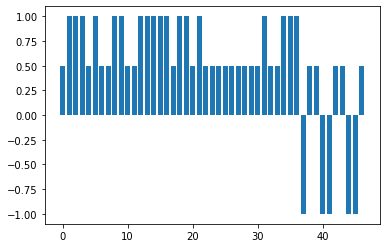

 
  всего изображений     | 47
  ---------------------
  найдено номеров       | 42
  ---------------------
  определенно правильно | 18
  ---------------------
  процент правильности  | 38.297872 %
  ---------------------
  процент правильно     |
  детектированных       | 42.857143 %
  из найденных          |
  
Варианты и кол-во
[('T', 25), ('K', 1)]
[('4', 20), ('6', 6)]
[('0', 26)]
[('4', 26)]
[('Y', 26)]
[('A', 26)]
[('47', 25), ('43', 1)] 

Список встречаемых номеров и их кол-во:
[('T404YA47', 18), ('T604YA47', 6), ('T404YA4', 2), ('7404YA47', 1), ('T44YA43', 1), ('AH4AHO11', 1), ('K404YA47', 1), ('E1O1H', 1), ('T40AYA47', 1), ('T404YA43', 1), ('T44AA4', 1), ('T4064YA47', 1), ('1404YA47', 1), ('MT404TA47', 1), ('TH10T547', 1), ('1404YK47', 1), ('4Y444Y', 1), ('A495PTT4', 1), ('4A42', 1), ('A475MOTT', 1), ('A475YAT', 1), ('66755TT', 1)] 

Список подходящих номеров:
[('T404YA47', 18), ('T604YA47', 6), ('K404YA47', 1), ('T404YA43', 1)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  T404YA47
ПРАВИЛЬНЫЙ О

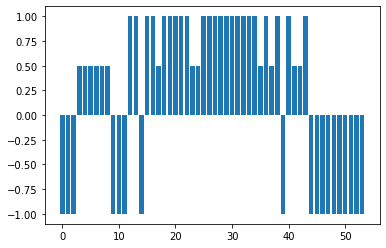

 
  всего изображений     | 54
  ---------------------
  найдено номеров       | 36
  ---------------------
  определенно правильно | 23
  ---------------------
  процент правильности  | 42.592593 %
  ---------------------
  процент правильно     |
  детектированных       | 63.888889 %
  из найденных          |
  
Варианты и кол-во
[('T', 26)]
[('6', 26)]
[('0', 26)]
[('0', 26)]
[('T', 26)]
[('M', 25), ('H', 1)]
[('93', 24), ('90', 2)] 

Список встречаемых номеров и их кол-во:
[('T600TM93', 23), ('T600TH9', 2), ('T00TM93', 2), ('T600TM90', 2), ('TA00TH993', 1), ('TH00TM93', 1), ('T00TH9', 1), ('C1X23', 1), ('T600TH93', 1), ('T50TM93', 1), ('T600TM937', 1), ('T600TM9', 1)] 

Список подходящих номеров:
[('T600TM93', 23), ('T600TM90', 2), ('T600TH93', 1)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  T600TM93
ПРАВИЛЬНЫЙ ОТВЕТ    :  T600TM93 True



/content/test/T600TM93.copy2.MP4


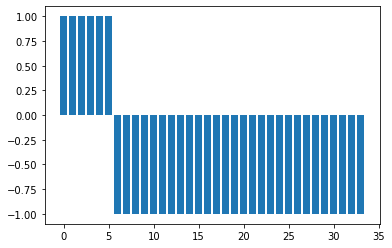

 
  всего изображений     | 34
  ---------------------
  найдено номеров       | 6
  ---------------------
  определенно правильно | 6
  ---------------------
  процент правильности  | 17.647059 %
  ---------------------
  процент правильно     |
  детектированных       | 100.000000 %
  из найденных          |
  
Варианты и кол-во
[('T', 6)]
[('6', 6)]
[('0', 6)]
[('0', 6)]
[('T', 6)]
[('M', 6)]
[('93', 6)] 

Список встречаемых номеров и их кол-во:
[('T600TM93', 6)] 

Список подходящих номеров:
[('T600TM93', 6)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  T600TM93
ПРАВИЛЬНЫЙ ОТВЕТ    :  T600TM93 True



/content/test/T600TM93.MP4


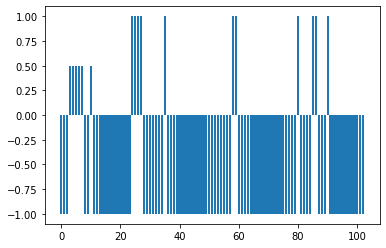

 
  всего изображений     | 103
  ---------------------
  найдено номеров       | 17
  ---------------------
  определенно правильно | 11
  ---------------------
  процент правильности  | 10.679612 %
  ---------------------
  процент правильно     |
  детектированных       | 64.705882 %
  из найденных          |
  
Варианты и кол-во
[('T', 15)]
[('6', 15)]
[('0', 15)]
[('0', 15)]
[('T', 15)]
[('M', 11), ('H', 3), ('P', 1)]
[('93', 14), ('96', 1)] 

Список встречаемых номеров и их кол-во:
[('T600TM93', 11), ('T600TH93', 3), ('T600TP96', 1), ('T60TH93', 1), ('4AE3', 1), ('T600TM9', 1)] 

Список подходящих номеров:
[('T600TM93', 11), ('T600TH93', 3), ('T600TP96', 1)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  T600TM93
ПРАВИЛЬНЫЙ ОТВЕТ    :  T600TM93 True



/content/test/Y618XX123.mp4


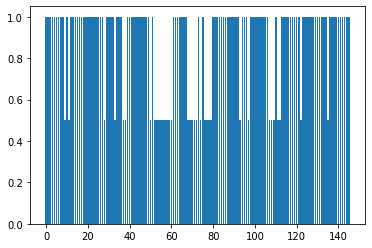

 
  всего изображений     | 146
  ---------------------
  найдено номеров       | 146
  ---------------------
  определенно правильно | 111
  ---------------------
  процент правильности  | 76.027397 %
  ---------------------
  процент правильно     |
  детектированных       | 76.027397 %
  из найденных          |
  
Варианты и кол-во
[('Y', 116), ('H', 3)]
[('6', 119)]
[('1', 119)]
[('8', 119)]
[('X', 118), ('A', 1)]
[('X', 118), ('A', 1)]
[('123', 114), ('12', 5)] 

Список встречаемых номеров и их кол-во:
[('Y618XX123', 111), ('618XX123', 13), ('Y618XX120', 10), ('Y618XX12', 5), ('H618XX123', 2), ('A414A1', 2), ('H618AA123', 1), ('426Y16', 1), ('618AX123', 1), ('A421A1A1', 1), ('A521A1A1', 1), ('A4214A1', 1), ('1XXA', 1), ('31XXA', 1), ('K4444P1H1', 1), ('A4445', 1), ('A4ATT111', 1), ('A5ETPA2', 1), ('A5A4AA31', 1), ('AAYT6', 1), ('5492', 1), ('25', 1), ('55O0', 1), ('545XM', 1), ('545X2', 1), ('545O0', 1), ('55O025', 1), ('5A504', 1), ('54550', 1), ('5A59', 1), ('5A0T9', 1), ('E55',

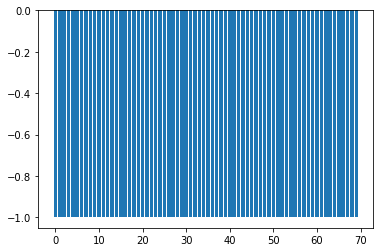

НЕ НАШЛИ НОМЕРОВ


/content/test/H388PY123.MOV


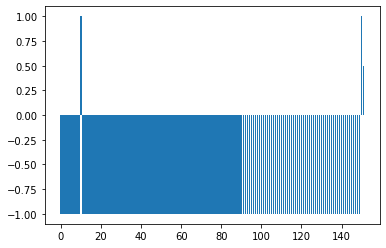

 
  всего изображений     | 152
  ---------------------
  найдено номеров       | 3
  ---------------------
  определенно правильно | 2
  ---------------------
  процент правильности  | 1.315789 %
  ---------------------
  процент правильно     |
  детектированных       | 66.666667 %
  из найденных          |
  
Варианты и кол-во
[('H', 2)]
[('3', 2)]
[('8', 2)]
[('8', 2)]
[('P', 2)]
[('Y', 2)]
[('123', 2)] 

Список встречаемых номеров и их кол-во:
[('H388PY123', 2), ('H388PY112', 1)] 

Список подходящих номеров:
[('H388PY123', 2)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  H388PY123
ПРАВИЛЬНЫЙ ОТВЕТ    :  H388PY123 True



/content/test/H755XC93.MOV


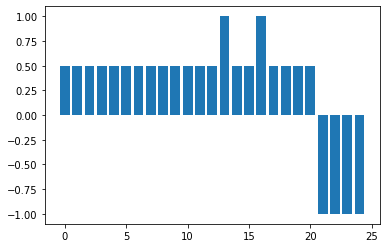

 
  всего изображений     | 25
  ---------------------
  найдено номеров       | 21
  ---------------------
  определенно правильно | 2
  ---------------------
  процент правильности  | 8.000000 %
  ---------------------
  процент правильно     |
  детектированных       | 9.523810 %
  из найденных          |
  
Варианты и кол-во
[('H', 10)]
[('7', 10)]
[('5', 10)]
[('5', 10)]
[('X', 9), ('Y', 1)]
[('C', 5), ('K', 2), ('O', 1), ('T', 1), ('E', 1)]
[('93', 4), ('10', 2), ('97', 2), ('91', 1), ('17', 1)] 

Список встречаемых номеров и их кол-во:
[('H755X10', 2), ('H755XC97', 2), ('H755XC93', 2), ('H755Y11', 1), ('H755X90', 1), ('H755X18', 1), ('H755XK10', 1), ('H755XO91', 1), ('H755XK17', 1), ('H755XC10', 1), ('A755XYO93', 1), ('H755YT93', 1), ('H755XE93', 1), ('AH755E93', 1), ('H755BE337', 1), ('A726BE333', 1), ('T55A330', 1), ('AA754EET3', 1)] 

Список подходящих номеров:
[('H755XC97', 2), ('H755XC93', 2), ('H755XK10', 1), ('H755XO91', 1), ('H755XK17', 1), ('H755XC10', 1), ('H755YT93', 

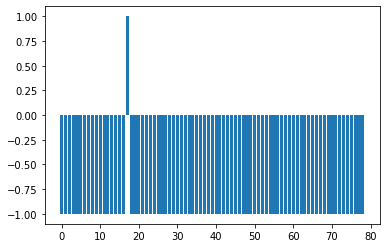

 
  всего изображений     | 79
  ---------------------
  найдено номеров       | 1
  ---------------------
  определенно правильно | 1
  ---------------------
  процент правильности  | 1.265823 %
  ---------------------
  процент правильно     |
  детектированных       | 100.000000 %
  из найденных          |
  
Варианты и кол-во
[('H', 1)]
[('H', 1)]
[('0', 1)]
[('9', 1)]
[('3', 1)]
[('9', 1)]
[('60', 1)] 

Список встречаемых номеров и их кол-во:
[('HH093960', 1)] 

Список подходящих номеров:
[('HH093960', 1)] 

ПРЕДПОЛАГАЕМЫЙ ОТВЕТ:  HH093960
ПРАВИЛЬНЫЙ ОТВЕТ    :  HH093960 True





In [121]:
result_right_detect_count = 0
result_wrong_detect_count = 0
non_detected = 0

for q in range(len(pic)):
  video_path = pic[q]
  name = names[q]
  predict_list = []
  right_detect = 0
  detect = 0
  graph_y = []
  graph_x = []

  video = cv2.VideoCapture(video_path)
  flag = video.set(cv2.CAP_PROP_FPS, 8) #не работает тут
  #print(flag)

  all_count = 0
  x = 0

  while(True):
    ret, frame = video.read()
    #print("файл открылся: ", ret)
    if not ret:
      break
    #img = mpimg.imread(pic[i]) #если есть только пути, а не фото в массиве pic
    lst = []
    state, lst, status = detect_number(frame, name)   #нашли номер, массив найденных номеров, совпадает ли 
    predict_list.extend(lst)
    graph_x.append(x)
    x += 1
    if state == True:
      detect += 1
      if status == True:
        right_detect += 1 
        graph_y.append(1) 
      else:
        graph_y.append(0.5)
    else:
      graph_y.append(-1)
    all_count += 1
  #print(predict_list)

  print(pic[q])
  plt.bar(graph_x, graph_y)
  plt.show()

  if detect == 0:
    print("НЕ НАШЛИ НОМЕРОВ\n\n")
    non_detected += 1
  else:
    print( 
  """ 
  всего изображений     | %d
  ---------------------
  найдено номеров       | %d
  ---------------------
  определенно правильно | %d
  ---------------------
  процент правильности  | %f %%
  ---------------------
  процент правильно     |
  детектированных       | %f %%
  из найденных          |
  """
  %(
    all_count,
    detect,
    right_detect,
    right_detect/all_count*100,
    right_detect/detect*100
    ))



    import collections
    c = collections.Counter()
    for word in predict_list:
      c[word] += 1
    ans = []
    for num in list(c.most_common()):
      tmp = list(num[0])
      if len(tmp)==8 or len(tmp)==9:
        tmp_num = tmp[1:4]
        tmp_region = tmp[6:]
        tmp_literal = [tmp[0]]
        tmp_literal.extend(tmp[4:6])                            
        tmp_num = ''.join(map(str, tmp_num))    # должно быть числом
        tmp_region = ''.join(map(str, tmp_region))    # должно быть числом
        tmp_literal = ''.join(map(str, tmp_literal))    # должно быть буквами

        tmp_lit_truck = tmp[0:2]
        tmp_num_truck = tmp[2:6]
        tmp_lit_truck = ''.join(map(str, tmp_lit_truck))    # должно быть числом
        tmp_num_truck = ''.join(map(str, tmp_num_truck))    # должно быть буквами
        if (tmp_num.isdigit() and tmp_literal.isalpha() and tmp_region.isdigit()) or (tmp_lit_truck.isalpha() and tmp_num_truck.isdigit()):
          if tmp_region in all_region:
            ans.append(num[0])        

    if len(ans) == 0:
      print(c.most_common())
      result_wrong_detect_count += 1
      print('НОМЕР НЕ СООТВЕТСВУЕТ ГОСТУ легковых автомобилей\n\n')
    else:

      tmp_list = []   # список найденных номеров - неподходящие по правилам
      all_numbers = collections.Counter()
      for num in predict_list:
        if num in ans:
          all_numbers[num] += 1 
          tmp_list.append(num)


      r = list(map(lambda x: x[6:], tmp_list))
      fl = list(map(lambda x: x[0], tmp_list))
      sl = list(map(lambda x: x[4], tmp_list))
      tl = list(map(lambda x: x[5], tmp_list))
      fn = list(map(lambda x: x[1], tmp_list))
      sn = list(map(lambda x: x[2], tmp_list))
      tn = list(map(lambda x: x[3], tmp_list))

      region = collections.Counter()
      first_lit = collections.Counter()
      second_lit = collections.Counter()
      third_lit = collections.Counter()
      first_num = collections.Counter()
      second_num = collections.Counter()
      third_num = collections.Counter()

      for i in r:
        region[i] += 1
      for i in fl:
        first_lit[i] += 1
      for i in sl:
        second_lit[i] += 1
      for i in tl:
        third_lit[i] += 1
      for i in fn:
        first_num[i] += 1
      for i in sn:
        second_num[i] += 1
      for i in tn:
        third_num[i] += 1

      detect_region = region.most_common(1)[0][0]
      detect_first_lit = first_lit.most_common(1)[0][0]
      detect_second_lit = second_lit.most_common(1)[0][0]
      detect_third_lit = third_lit.most_common(1)[0][0]
      detect_first_num = first_num.most_common(1)[0][0]
      detect_second_num = second_num.most_common(1)[0][0]
      detect_third_num = third_num.most_common(1)[0][0]


      print('Варианты и кол-во')
      print(first_lit.most_common())
      print(first_num.most_common())
      print(second_num.most_common())
      print(third_num.most_common())
      print(second_lit.most_common())
      print(third_lit.most_common())
      print(region.most_common(), '\n')

      print("Список встречаемых номеров и их кол-во:")
      print(list(c.most_common()), '\n')
      print('Список подходящих номеров:')
      print(list(all_numbers.most_common()), '\n')
      
      predict_answer = detect_first_lit + detect_first_num + detect_second_num + detect_third_num + detect_second_lit + detect_third_lit + detect_region
      tmp_state = False
      if predict_answer == name:
        result_right_detect_count += 1
        tmp_state = True
      else:
        result_wrong_detect_count += 1

      print("ПРЕДПОЛАГАЕМЫЙ ОТВЕТ: ", predict_answer)
      print("ПРАВИЛЬНЫЙ ОТВЕТ    : ", name, tmp_state)
      print('\n\n')


In [122]:
print(
"""
Всего машин                 | %d
------------------------------------
Правильно нашли             | %d
------------------------------------
Неправильно нашли           | %d
------------------------------------
Вообще не нашли             | %d
------------------------------------
Точность                    | %f %%
------------------------------------
Точность определения номера | %f %%
""" %(
    len(pic),
    result_right_detect_count,
    result_wrong_detect_count,
    non_detected,
    result_right_detect_count/len(pic)*100,
    result_right_detect_count/(len(pic)-non_detected)*100
    ))


Всего машин                 | 18
------------------------------------
Правильно нашли             | 14
------------------------------------
Неправильно нашли           | 3
------------------------------------
Вообще не нашли             | 1
------------------------------------
Точность                    | 77.777778 %
------------------------------------
Точность определения номера | 82.352941 %

